# Fake news Analysis with Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
spam = pd.read_csv('Fake.csv') # data set read

In [3]:
spam

Category                                            Message  \
0     Notfake  Go until jurong point, crazy.. Available only ...   
1     Notfake                      Ok lar... Joking wif u oni...   
2        fake  Free entry in 2 a wkly comp to win FA Cup fina...   
3     Notfake  U dun say so early hor... U c already then say...   
4     Notfake  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5567     fake  This is the 2nd time we have tried 2 contact u...   
5568  Notfake               Will ü b going to esplanade fr home?   
5569  Notfake  Pity, * was in mood for that. So...any other s...   
5570  Notfake  The guy did some bitching but I acted like i'd...   
5571  Notfake                         Rofl. Its true to its name   

                                        politifact_page claim_source  \
0     http://www.politifact.com/punditfact/statement...     Bloggers   
1     http://www.politifact.com/punditfact/statement...     Bloggers   
2     http://www.politifact.com/punditfact/statement...     Bloggers   
3     http://www.politifact.com/punditfact/statement...     Bloggers   
4     http://www.politifact.com/punditfact/statement...     Bloggers   
...                                                 ...          ...   
5567                                                NaN          NaN   
5568                                                NaN          NaN   
5569                                                NaN          NaN   
5570                                                NaN          NaN   
5571                                                NaN          NaN   

                                         claim_citation claim_label  \
0     —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
1     —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
2     —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
3     —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
4     —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
...                                                 ...         ...   
5567                                                NaN         NaN   
5568                                                NaN         NaN   
5569                                                NaN         NaN   
5570                                                NaN         NaN   
5571                                                NaN         NaN   

                               date_published  researched_by  \
0     Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin   
1     Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin   
2     Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin   
3     Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin   
4     Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin   
...                                       ...            ...   
5567                                      NaN            NaN   
5568                                      NaN            NaN   
5569                                      NaN            NaN   
5570                                      NaN            NaN   
5571                                      NaN            NaN   

             edited_by       tags  \
0     Aaron Sharockman  Fake news   
1     Aaron Sharockman  Fake news   
2     Aaron Sharockman  Fake news   
3     Aaron Sharockman  Fake news   
4     Aaron Sharockman  Fake news   
...                ...        ...   
5567               NaN        NaN   
5568               NaN        NaN   
5569               NaN        NaN   
5570               NaN        NaN   
5571               NaN        NaN   

                                          page_citation  \
0     USADailyTime.com, "Snoop Dogg Arrested For Con...   
1     TheLastLineOfDefense.org, "BREAKING: Snoop Dog...   
2     PolitiFact Georgia, "No evidence to support cl...   
3     CNN, "Trump: I

In [4]:
spam.shape

(5572, 15)

In [5]:
spam.describe()

Unnamed: 12        CLASS
count          0.0  2923.000000
mean           NaN     0.111187
std            NaN     0.314418
min            NaN     0.000000
25%            NaN     0.000000
50%            NaN     0.000000
75%            NaN     0.000000
max            NaN     1.000000

In [6]:
spam.groupby(spam['Category']).size()

Category
Notfake    4825
fake        747
dtype: int64

We have a total of 5572 data. There are %83 safe and %17 spam.

In [7]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'fake' else 0) 

We changed the spam values in the Category column with 1 and the raw values with 0.

In [8]:
spam.head()

Category                                            Message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

                                     politifact_page claim_source  \
0  http://www.politifact.com/punditfact/statement...     Bloggers   
1  http://www.politifact.com/punditfact/statement...     Bloggers   
2  http://www.politifact.com/punditfact/statement...     Bloggers   
3  http://www.politifact.com/punditfact/statement...     Bloggers   
4  http://www.politifact.com/punditfact/statement...     Bloggers   

                                      claim_citation claim_label  \
0  —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
1  —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
2  —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
3  —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   
4  —  Bloggers on Tuesday, March 14th, 2017 in In...  pants-fire   

                            date_published  researched_by         edited_by  \
0  Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin  Aaron Sharockman   
1  Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin  Aaron Sharockman   
2  Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin  Aaron Sharockman   
3  Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin  Aaron Sharockman   
4  Thursday, March 23rd, 2017 at 3:30 p.m.  Joshua Gillin  Aaron Sharockman   

        tags                                      page_citation  \
0  Fake news  USADailyTime.com, "Snoop Dogg Arrested For Con...   
1  Fake news  TheLastLineOfDefense.org, "BREAKING: Snoop Dog...   
2  Fake news  PolitiFact Georgia, "No evidence to support cl...   
3  Fake news  CNN, "Trump: I could 'shoot somebody and I wou...   
4  Fake news  TheDailyBeast.com, "Marilyn Manson’s Shocking ...   

                                            page_url  Unnamed: 12  \
0     http://usadailytime.com/justin-snoop-arrested/          NaN   
1  http://thelastlineofdefense.org/breaking-snoop...          NaN   
2  http://www.politifact.com/georgia/statements/2...          NaN   
3  http://www.cnn.com/2016/01/23/politics/donald-...          NaN   
4  http://www.thedailybeast.com/articles/2016/11/...          NaN   

                                             CONTENT  CLASS  
0  Huh, anyway check out this you[tube] channel: ...    1.0  
1  Hey guys check out my new channel and our firs...    1.0  
2             just for test I have to say murdev.com    1.0  
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿    1.0  
4            watch?v=vtaRGgvGtWQ   Check this out .﻿    1.0

In [9]:
messages = spam.iloc[:,1] # Messages column

In [10]:
messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [11]:
ifSpam = spam.iloc[:,0] # Spam column

In [12]:
ifSpam.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [13]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)

We will use 75% of our dataset for training and 25% for testing 

In [14]:
cv = CountVectorizer()

With CountVectorizer, text is analyzed and word counts are made and these are converted into vectors.

In [15]:
features = cv.fit_transform(messages_train)

In [16]:
features_test = cv.transform(messages_test)

# Learning and Predicts 

In [17]:
knModel = KNeighborsClassifier(n_neighbors=1)

In [18]:
knModel.fit(features, ifSpam_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
knPredict = knModel.predict(features_test)

In [20]:
dtModel = tree.DecisionTreeClassifier() 

In [21]:
dtModel.fit(features, ifSpam_train)

DecisionTreeClassifier()

In [22]:
dtPredict = dtModel.predict(features_test)

In [23]:
svModel = svm.SVC()

In [24]:
svModel.fit(features,ifSpam_train)

SVC()

In [25]:
svPredict = svModel.predict(features_test)

In [26]:
rfModel = RandomForestClassifier() 

In [27]:
rfModel.fit(features, ifSpam_train) 

RandomForestClassifier()

In [28]:
rfPredict = rfModel.predict(features_test)

# Visualization

In [31]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [32]:
def visualization(model):
    predict = model.predict(features_test)
    plot_confusion_matrix(model,features_test,ifSpam_test)
    plot_precision_recall_curve(model,features_test,ifSpam_test)
    plot_roc_curve(model,features_test,ifSpam_test)

# Results

### K-Nearest Neighbors 

In [33]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 69


In [34]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro')

In [35]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 95.04666188083274 with the K-Nearest-Neighbors


C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_r

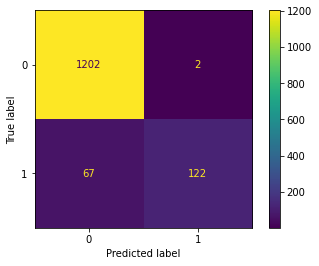

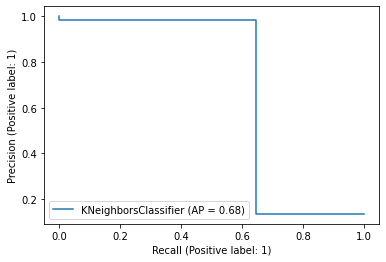

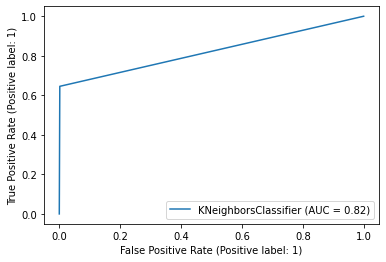

In [36]:
visualization(knModel)

### Random Forest

In [35]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != rfPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 27


In [36]:
successRate = 100.0 * f1_score(ifSpam_test, rfPredict, average='micro')

In [37]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Random Forest")

The Success Rate was calculated as % : 98.06173725771716 with Random Forest


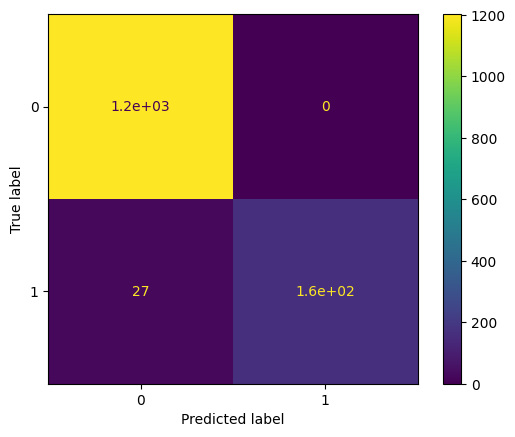

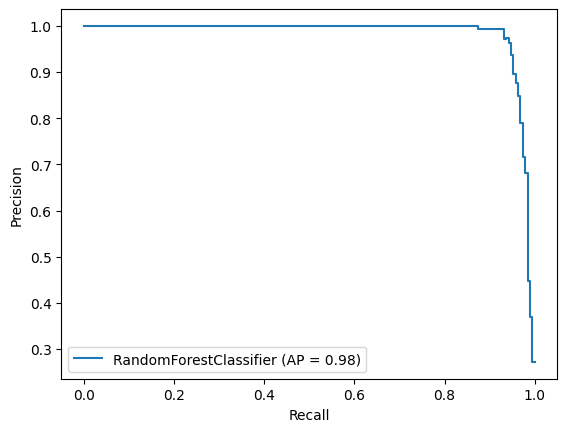

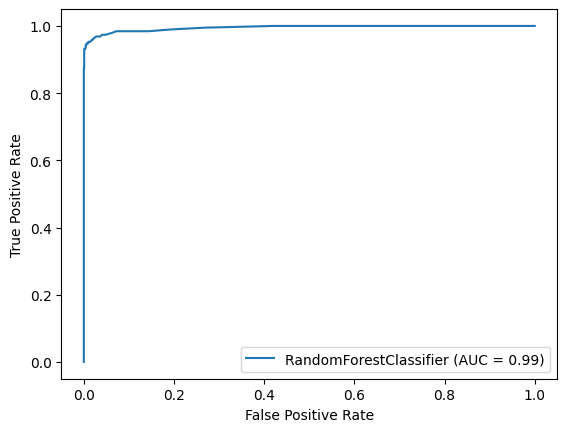

In [38]:
visualization(rfModel)

### Decision Tree

In [39]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 41


In [40]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [41]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 97.05671213208902 with Decision Tree


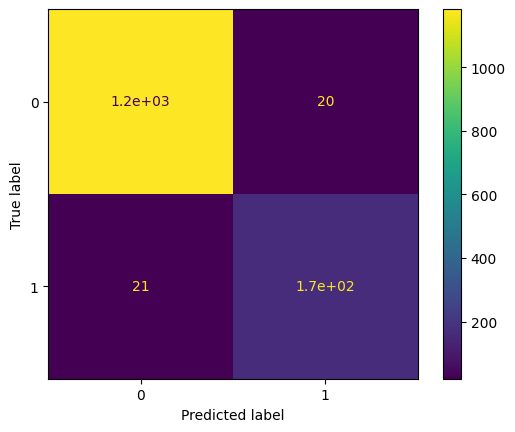

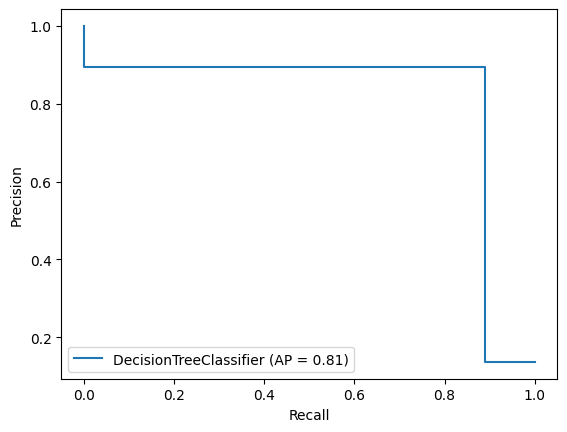

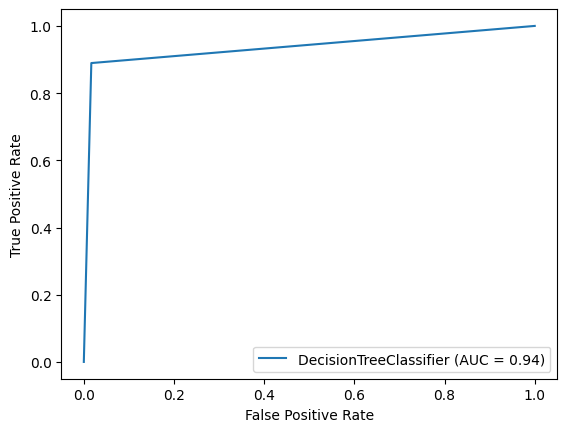

In [42]:
visualization(dtModel)

### Support Vector Machine

In [43]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != svPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 22


In [44]:
successRate = 100.0 * f1_score(ifSpam_test, svPredict, average='micro')

In [45]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Support Vector Machine")

The Success Rate was calculated as % : 98.42067480258436 with Support Vector Machine


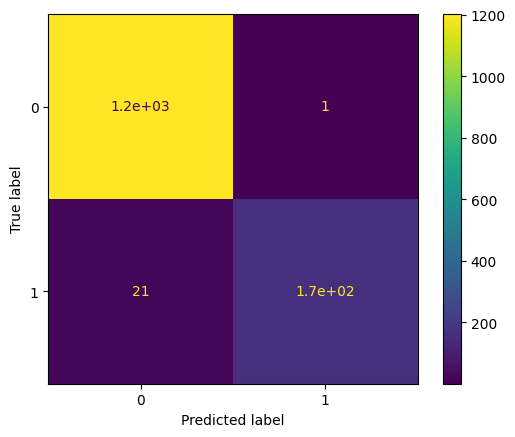

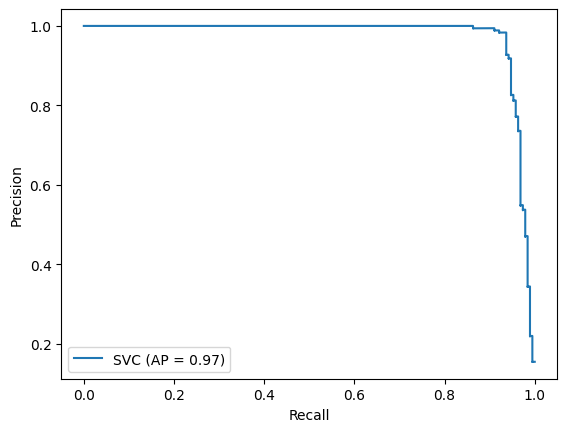

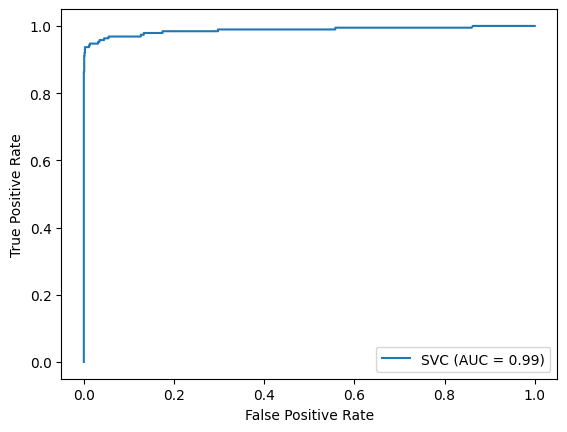

In [46]:
visualization(svModel)